In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import dtale as dt

In [3]:
def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''
    
def convert_dtypea(x):
    if not x:
        return ''
    try:
        return int(x)   
    except:        
        return ''

#converting datatypes
smile = pd.read_csv('../data/Smileon.2021.10.17.csv', skiprows=2, header=0, encoding='latin-1',  converters={
    'LinkedToCallReportNum':convert_dtype, 'ThirdPartyStateProvince':convert_dtype, 'FeedbackFromPhoneWorkerName':convert_dtype,
'SMILE ON 60+ Demographic Information - # of People in Household':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 2393 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - 2950 - Quantity':convert_dtypea, 'Birth Year':convert_dtype, 'SMILE ON 60+ Oral Care Encounter - 4342 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - 7140 - Quantity':convert_dtypea, 'SMILE ON 60+ Oral Care Encounter - 7320 - Quantity':convert_dtypea,
'SMILE ON 60+ Oral Care Encounter - Lab Assist narrative':convert_dtype, 'SMILE ON 60+ Case Management Information - What is the outcome for the client?':convert_dtype,
'SMILE ON 60+ Case Management Information - Dental Clinic':convert_dtype}
)

In [4]:
smile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Columns: 184 entries, CallReportNum to SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
dtypes: float64(103), int64(6), object(75)
memory usage: 81.2+ MB


In [5]:
#dropping unused columns
smile_new = smile.drop(columns={'WasRealCall','WasHangup','WasSexCall','WasWrongNumber','WasPrankCall','WasSilentCall','GeoCode',
                   'GeoAssignment','CensusDivision','CensusTrack','CensusReportingArea','211Region',
                   'ThirdPartyName','ThirdPartyOrganization','ThirdPartyPhoneNumber','ThirdPartyAddress',
                   'ThirdPartyCity','ThirdPartyCounty','ThirdPartyStateProvince','ThirdPartyPostalCode',
                   'VolunteerComments','CallersFeedback','TextField2','TextField3','TextField4','TextField5',
                   'TextField6','TextField7','TextField8','TextField9','TextField10','Supervisor','IPAddress',
                   'VolIdentifier'})

In [6]:
smile_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Columns: 150 entries, CallReportNum to SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
dtypes: float64(70), int64(6), object(74)
memory usage: 66.2+ MB


In [7]:
#dropping dup column
smile_new = smile_new.drop(columns={'SMILE ON 60+ Presumptive Eligibility - What is the next step for clients encounter? '})

In [8]:
import re

In [9]:
birth_series = smile_new['Birth Year'].value_counts()
ex = birth_series.loc[birth_series <=10]
ex

1963       9
1964       6
2021       5
1962       5
1967       5
1919       4
#VALUE!    3
1971       3
2019       3
1965       3
2018       3
1968       3
2020       3
#NUM!      2
1918       2
1976       2
1972       2
1920       2
1975       1
2354       1
1978       1
1991       1
1985       1
1966       1
2298       1
1970       1
1994       1
5245       1
1983       1
2041       1
Name: Birth Year, dtype: int64

In [10]:
#to get age column, need '#VALUE' and '#NUM' columns to be removed
smile_new['Birth Year'] = smile_new['Birth Year'].astype(str).str.replace('#VALUE!', '0').replace('#NUM!', '0').astype(int)

In [11]:
smile_new['Birth Year']

0        1960
1        1959
2        1942
3        1960
4        1955
         ... 
57855    1957
57856    1958
57857    1900
57858    1958
57859    1958
Name: Birth Year, Length: 57860, dtype: int32

In [12]:
smile_new['Age'] = 2021 - smile_new['Birth Year']

In [13]:
smile_new['Age'].value_counts()

 64      5407
 63      5352
 65      5061
 66      4272
 62      4164
         ... 
 51         1
 27         1
-20         1
 38         1
-3224       1
Name: Age, Length: 71, dtype: int64

In [14]:
d = dt.show(smile_new)
d.open_browser()

In [15]:
age_series = smile_new['Age'].value_counts()
age_df = pd.DataFrame({'Age':age_series.index, 'Count':age_series.values})
age_df

,Age,Count
0,64,5407
1,63,5352
2,65,5061
3,66,4272
4,62,4164
...,...,...
66,51,1
67,27,1
68,-20,1
69,38,1


In [16]:
age_df = age_df[~(age_df['Age'] >= 100)]
age_df = age_df[~(age_df['Age'] <= 60)]

In [17]:
age_df.set_index('Age', inplace=True)
age_df

,Count
Age,
64,5407
63,5352
65,5061
66,4272
62,4164
67,3379
68,3011
69,2555
61,2291


(array([ 55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

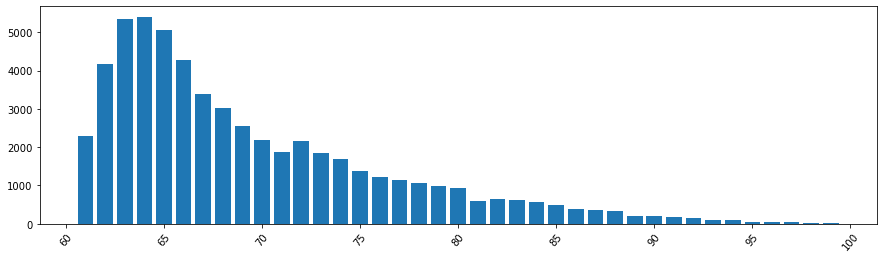

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

x = age_df.index
y = age_df.Count


plt.figure(figsize=(15,4))
plt.bar(x, y)
plt.xticks(rotation=50)

In [36]:
#a little out of order, but above is age numbers. now to rename some columns
smile_new.columns = [x.replace('SMILE ON 60+ ', '') for x in smile_new.columns]

In [26]:
smile_demo = smile_new[['CallerNum','Demographic Information - Gender', 'Age']].copy()
smile_demo

,CallerNum,Demographic Information - Gender,Age
0,3638169,Female,61
1,4431194,Female,62
2,2941341,Male,79
3,3823933,Male,61
4,3348256,Female,66
...,...,...,...
57855,2385621,Female,64
57856,2631417,Female,63
57857,-1,NaN,121
57858,3239813,Male,63


In [ ]:
dem = dt.show(smile_demo)
dem.open_browser()

Above is a demographics dataframe, but it might not be used.

In [45]:
smile_new.groupby('CallerNum')['Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?'].value_counts()

CallerNum  Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?
-2         Poor                                                                                                        3
           Dont know                                                                                                   2
-1         Good                                                                                                        1
 2384106   Poor                                                                                                       14
 2384744   Dont know                                                                                                  10
                                                                                                                      ..
 4569713   Poor                                                                                                        2
 4569737   Poor                       

In [46]:
smile_new['CallerNum'].value_counts()

-1          63
 3212379    54
 2441776    43
 2758373    42
 2431132    37
            ..
 2752620     1
 2752625     1
 2752629     1
 2752646     1
 2384897     1
Name: CallerNum, Length: 10711, dtype: int64

In [47]:
smile_new.info()
#important to note that there are quite a few more rows than there are individual patients

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Columns: 150 entries, CallReportNum to Age
dtypes: float64(70), int32(2), int64(6), object(72)
memory usage: 65.8+ MB


In [49]:
smile_new.to_csv('../data/smile_new.csv', index=False)

Executing shutdown due to inactivity...


2021-11-09 20:10:44,079 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-11-09 20:11:00,517 - INFO     - Executing shutdown...
